# **Airbnb Case Study Notebook**

## Objectives

* Have the requirements of my client answered. 
 * The client would like to know what are the three cities with the best average (higher price) daily rental price for an entire house/apt;
 * Considering the number of bedrooms and the distance of the property from the city center and the nearest metro, they would like to know
 what influences prices the most, so rental price of future acquired properties can be predicted.

## Inputs

* Use the data processed that was collected from Kaggle `outputs/datasets/collection/AirbnbEuropeanCities.csv`. 

## Outputs

* Have code generated to answer the requirements of my client.  

---

# Change working directory

Have the working directory changed from its current folder to its parent folder.
* We access the current directory with `os.getcwd()`.

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/europe-airbnb-prices/jupyter_notebooks'

Have the parent of the current directory set up as the new current directory.
* `os.path.dirname()` gets the parent directory;
* `os.chir()` defines the new current directory.

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Have the new current directory confirmed.

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/europe-airbnb-prices'

---

# Loading Data 

Have data loaded for the next steps of the analysis process.

In [5]:
import pandas as pd
df = pd.read_csv(f"outputs/datasets/collection/EuropeanCitiesAirbnb.csv")
df.head(10)

,city,bedrooms,room_type,city_center_dist_km,metro_dist_km,daily_price,weekends
0,Amsterdam,1,Private room,4.763,0.852,319.64,1
1,Amsterdam,1,Private room,5.748,3.652,348.00,1
2,Amsterdam,2,Private room,0.385,0.440,482.98,1
3,Amsterdam,1,Private room,0.545,0.319,485.55,1
4,Amsterdam,3,Entire home/apt,1.687,1.458,2771.54,1
5,Amsterdam,2,Entire home/apt,3.719,1.196,1001.80,1
6,Amsterdam,1,Entire home/apt,1.808,1.902,393.46,1
7,Amsterdam,1,Private room,3.142,0.924,287.77,1
8,Amsterdam,1,Entire home/apt,1.010,0.917,909.47,1
9,Amsterdam,1,Private room,2.183,1.590,393.46,1


---

# Data Exploration 

Before starting the analysis to meet my client's need, I will have variables type and their distribuition checked to become more familiar with the dataset.

In [6]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Processing and Analysing Data

### Processing Data

After analysing the result of the data exploration, data will be processed to have any errors and inacurances eliminated, so the analysis can be started.

1. Handling Skewness:

    + Have the distribuition of rental prices visualised to identify potencial outliers before making decisions;

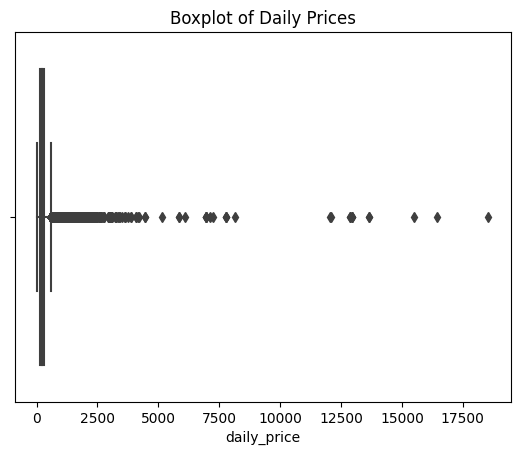

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='daily_price')
plt.title('Boxplot of Daily Prices')
plt.show()

  + Applying the logarithm transformation to `daily_price`, to check if it can help normalize the data, making it easier to be analysed.

In [8]:
import numpy as np
df['log_daily_price'] = np.log1p(df['daily_price'])
df.head()

,city,bedrooms,room_type,city_center_dist_km,metro_dist_km,daily_price,weekends,log_daily_price
0,Amsterdam,1,Private room,4.763,0.852,319.64,1,5.770319
1,Amsterdam,1,Private room,5.748,3.652,348.00,1,5.855072
2,Amsterdam,2,Private room,0.385,0.440,482.98,1,6.182044
3,Amsterdam,1,Private room,0.545,0.319,485.55,1,6.187340
4,Amsterdam,3,Entire home/apt,1.687,1.458,2771.54,1,7.927519


+ Visualising the transformation:

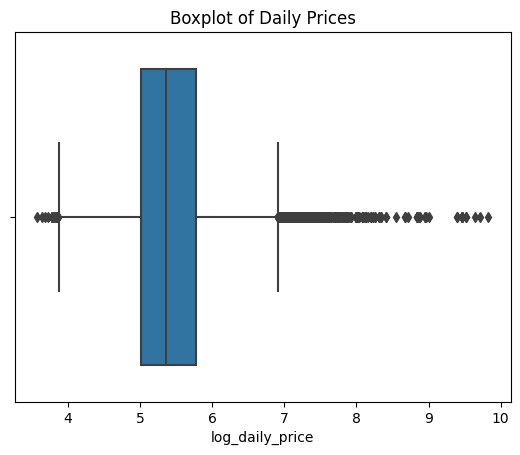

In [9]:
sns.boxplot(data=df, x='log_daily_price')
plt.title('Boxplot of Daily Prices')
plt.show()

`The log transformation has stabilized the variance and mitigated the effect of extreme values (outliers). This information will be useful when we set up the model to predict prices.`

2. Filtering the Data:

    + Have the column `room_type` filtered out, since my client is only interested in entire homes or apartments.

In [10]:
df_filtered = df[df['room_type'] == 'Entire home/apt']
df_filtered.head()

,city,bedrooms,room_type,city_center_dist_km,metro_dist_km,daily_price,weekends,log_daily_price
4,Amsterdam,3,Entire home/apt,1.687,1.458,2771.54,1,7.927519
5,Amsterdam,2,Entire home/apt,3.719,1.196,1001.80,1,6.910551
6,Amsterdam,1,Entire home/apt,1.808,1.902,393.46,1,5.977518
8,Amsterdam,1,Entire home/apt,1.010,0.917,909.47,1,6.813961
10,Amsterdam,1,Entire home/apt,2.933,0.628,553.04,1,6.317237


### Analysing Data

1. Calculating the Average Price:

    + Have the average daily prices calculated;
    + Have prices sorted in descending order to find the three best average daily rental prices for weekdays and weekends. In the `weekends` column we have **True = 1** and **False = 0**.

In [11]:
average_price = df_filtered.groupby(['city', 'weekends'])['daily_price'].mean().reset_index()
# Pivot the table to have weekends as columns for more clarity
avg_price_pivot = average_price.pivot(index='city', columns='weekends', values='daily_price')
# Have average prices sorted in descending order
best_prices = avg_price_pivot.sort_values(by=[0,1], ascending=False)
print(best_prices)


weekends            0           1
city                             
Amsterdam  733.178885  736.089473
Barcelona  572.559917  745.083278
London     551.540137  539.134789
Paris      435.592280  416.218425
Berlin     351.994831  376.229902
Lisbon     280.079606  284.884723
Vienna     254.550200  258.494027
Rome       237.431558  244.073577
Budapest   176.304327  193.380564
Athens     159.446269  150.673192


> **After analising the box plot chart I could identify some high values for daily prices that could misleading my conclusions, so I decided to run a second code to have the average price calculated where I have values `>=2000` filtered out of my analiysis and then I can compare both results retrieved and conclude if those high values are misleading my conclusions.**

In [21]:
# Filter the DataFrame to exclude daily prices over 2000
filtered_df_avg = df_filtered[df_filtered['daily_price'] <= 2000]
average_price2 = filtered_df_avg.groupby(['city', 'weekends'])['daily_price'].mean().reset_index()
avg_price_pivot2 = average_price2.pivot(index='city', columns='weekends', values='daily_price')
best_prices2 = avg_price_pivot2.sort_values(by=[0, 1], ascending=False)
print(best_prices2)

weekends            0           1
city                             
Amsterdam  687.749697  688.844878
Barcelona  526.217660  609.859200
London     509.458424  503.711748
Paris      418.773840  407.683403
Berlin     336.167521  357.954236
Lisbon     280.079606  284.884723
Vienna     245.137411  258.494027
Rome       235.894331  243.345702
Budapest   173.271179  190.101296
Athens     151.929505  150.673192


> Although the three cities with the best average daily rental prices have not changed, I will use the data with the `daily_prices` values filtered, as the high values presented in my data are more concentrate in the cities that will be used in the ML prediction and it can cause misleading information. 

2. Correlation Analysis

    + **Pearson Correlation** will be analysed to get a sense of linear relationships between price and your features of interest.

In [24]:
# Define the list of cities of interest
cities_of_interest = ['Amsterdam', 'Barcelona', 'London']
# Filter data to include only the relevant cities and columns of interest
relevant_columns = ['daily_price', 'bedrooms', 'city_center_dist_km', 'metro_dist_km', 'weekends', 'city']
df_subset = df_filtered[(df_filtered['city'].isin(cities_of_interest)) & (df_filtered['daily_price'] <= 2000)][relevant_columns]

# Calculate Pearson correlation
pearson_correlation = df_subset.corr(method='pearson')
price_pearson_corr = pearson_correlation['daily_price'].sort_values(key=abs, ascending=False)[1:]
price_pearson_corr

bedrooms               0.487564
city_center_dist_km   -0.379407
metro_dist_km         -0.181980
weekends              -0.002280
Name: daily_price, dtype: float64

3. Spearman Correlation:

    + **Spearman correlation** will be analysed to understand any non-linear relationships and account for potential outliers.

In [25]:
# Calculate Spearman correlation
spearman_correlation = df_subset.corr(method='spearman')
price_spearman_corr = spearman_correlation['daily_price'].sort_values(key=abs, ascending=False)[1:]
price_spearman_corr

bedrooms               0.531683
city_center_dist_km   -0.449534
metro_dist_km         -0.145970
weekends              -0.010224
Name: daily_price, dtype: float64

I will consider for my analysis the two best correlation levels of **Pearson** and **Spearman**.

In [34]:
best_corr = 3
set(price_pearson_corr[:best_corr].index.to_list() + price_spearman_corr[:best_corr].index.to_list())

{'bedrooms', 'city_center_dist_km', 'metro_dist_km'}

In [39]:
vars_to_analysis = ['bedrooms', 'city_center_dist_km', 'metro_dist_km']
vars_to_analysis

['bedrooms', 'city_center_dist_km', 'metro_dist_km']

---

# Performing Exploration Data Analysis (EDA) on `vars_to_analysis`

1. Data Overview:

    + Confirming that there are no hidden `nulls` or `NaNs` outside the displayed counts;
    + Have data described to get descriptive statistcs. 

In [40]:
print(df_subset.isnull().sum())

daily_price            0
bedrooms               0
city_center_dist_km    0
metro_dist_km          0
weekends               0
city                   0
dtype: int64


In [41]:
df_subset.describe()

,daily_price,bedrooms,city_center_dist_km,metro_dist_km,weekends
count,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000
mean,544.211948,1.342776,4.128198,0.800332,0.525813
std,270.447009,0.787797,2.507799,0.932067,0.499375
min,103.010000,0.000000,0.015000,0.020000,0.000000
25%,360.780000,1.000000,2.302250,0.292000,0.000000
50%,474.320000,1.000000,3.831500,0.476000,1.000000
75%,652.785000,2.000000,5.460000,0.903750,1.000000
max,1997.520000,5.000000,17.296000,7.507000,1.000000


2. Data Visualization:

    + Charts were created to better interpret the analysis.

* Histograms charts were used to better understand the numerical variables distribution.

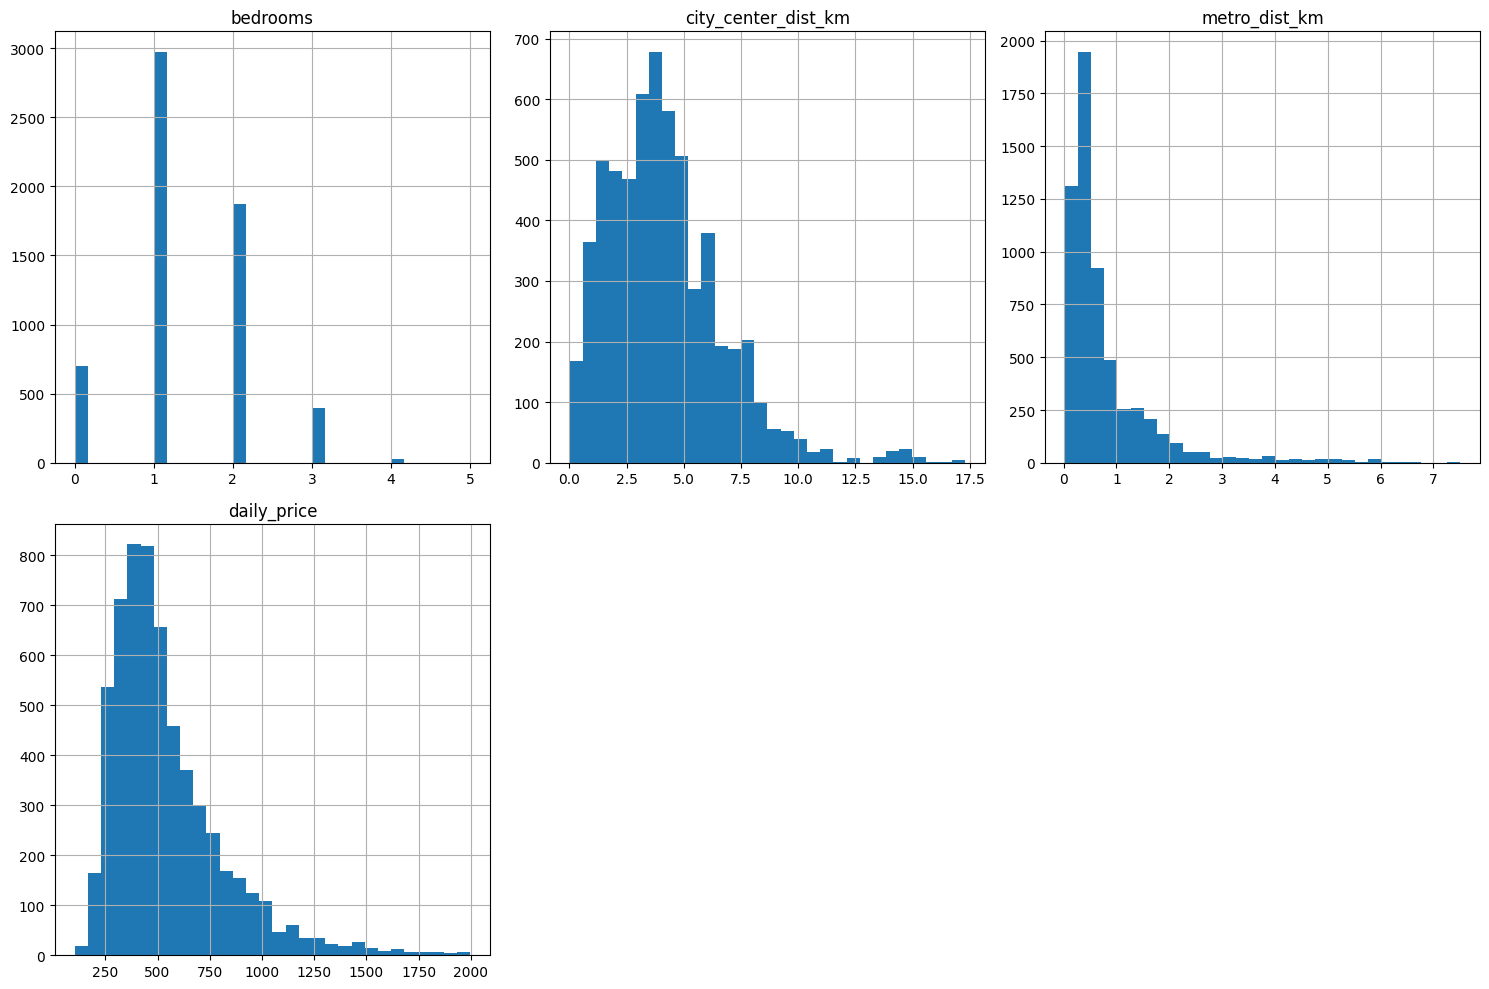

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
variables_to_plot = vars_to_analysis + ['daily_price']
df_subset[variables_to_plot].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.tight_layout()
plt.show()

* Scatter plot charts were used to explore relationship between `vars_to_analysis` and `daily_price`.

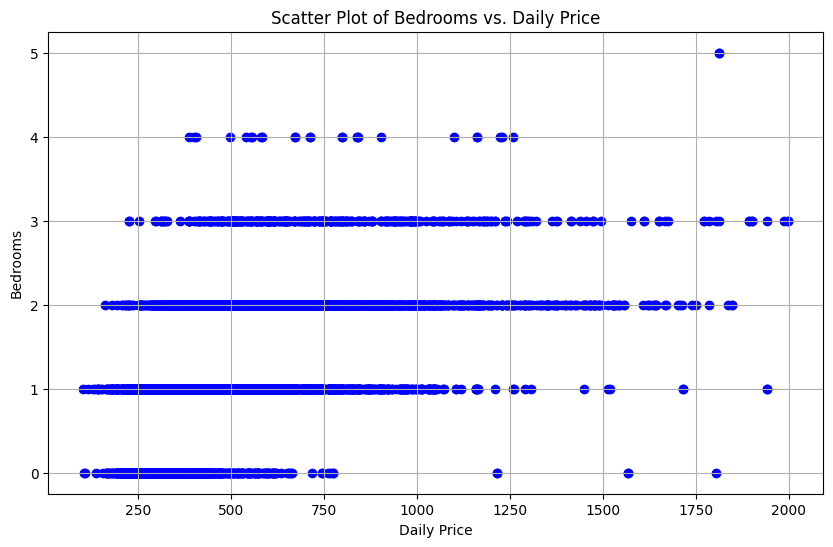

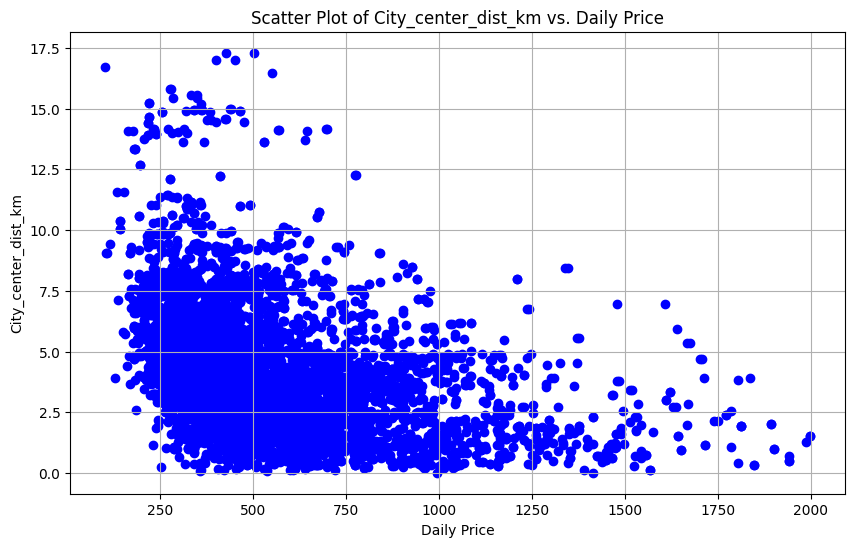

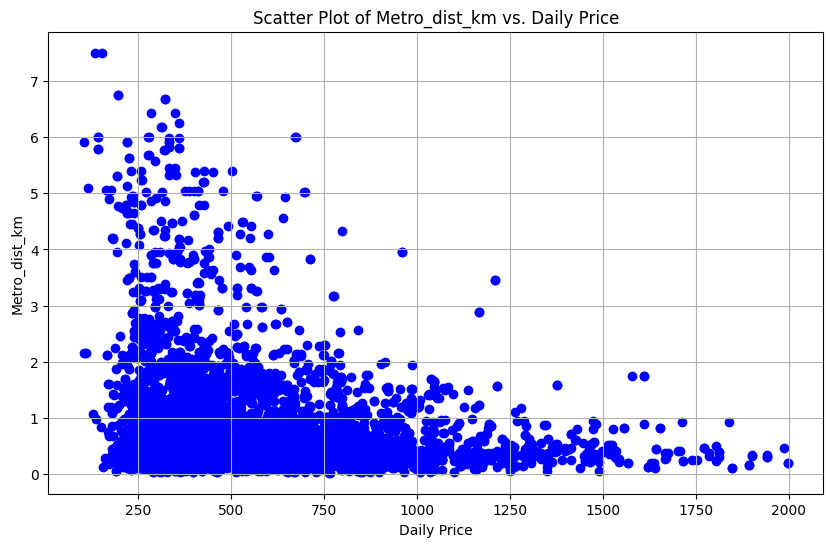

In [43]:
# Loop through each variable in vars_to_analysis
for var in vars_to_analysis:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_subset['daily_price'], df_subset[var], color='blue')
    plt.title(f'Scatter Plot of {var.capitalize()} vs. Daily Price')
    plt.xlabel('Daily Price')
    plt.ylabel(var.capitalize())
    plt.grid()
    plt.show()

+ A bar plot chart was used to visualize the average prices per city differentiated by weekends.

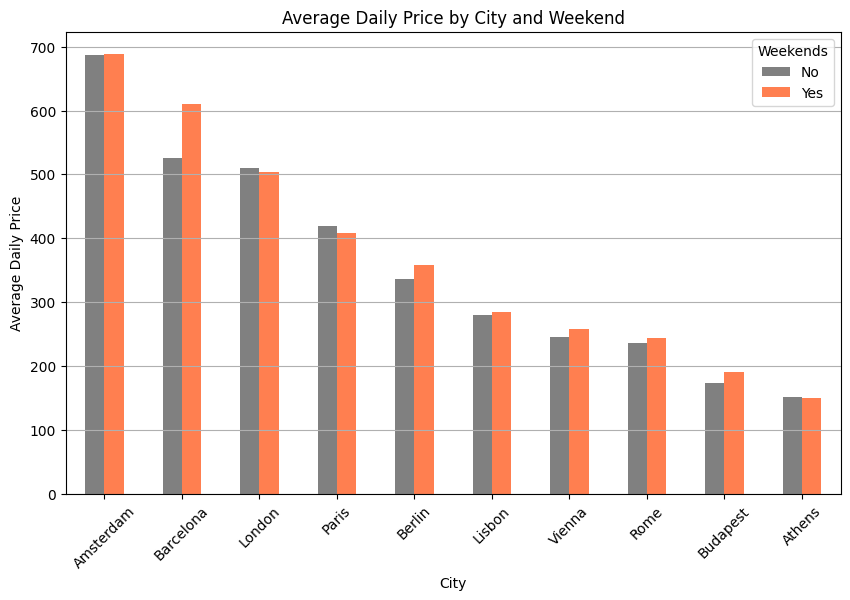

In [44]:
best_prices2.plot(kind='bar', figsize=(10, 6), color=['grey', 'coral'])

# Adding labels and title
plt.title('Average Daily Price by City and Weekend')
plt.xlabel('City')
plt.ylabel('Average Daily Price')
plt.xticks(rotation=45)
plt.legend(title='Weekends', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()

+ Bar plot charts were used to visualize the average value of `vars_to_analysis` by `city`.

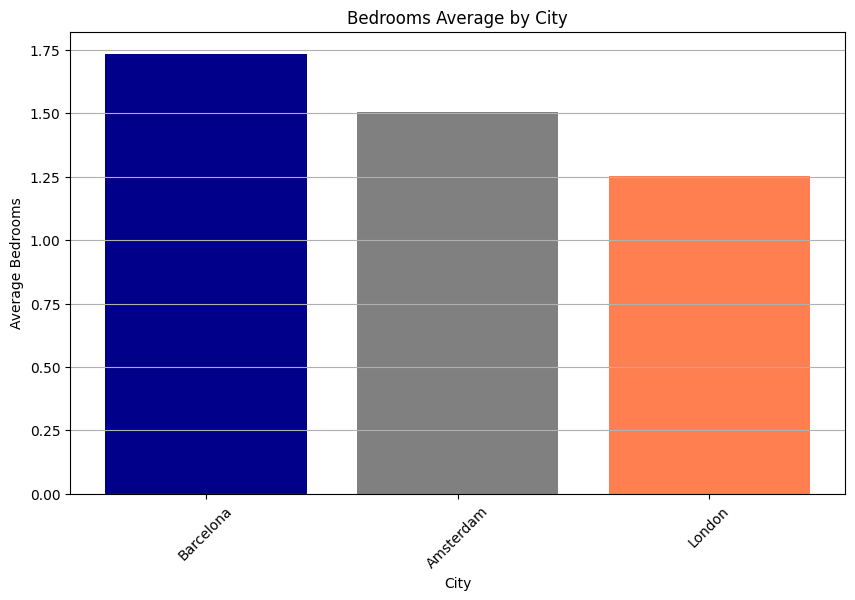

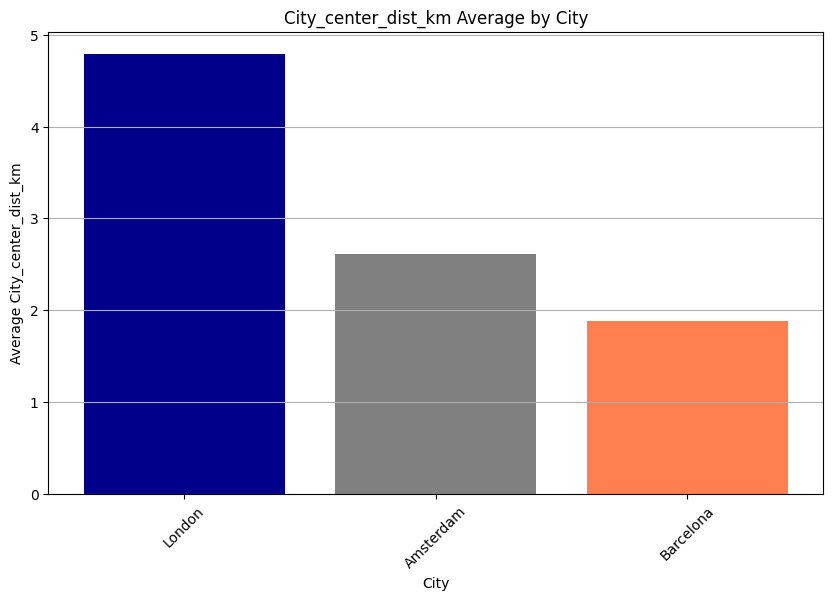

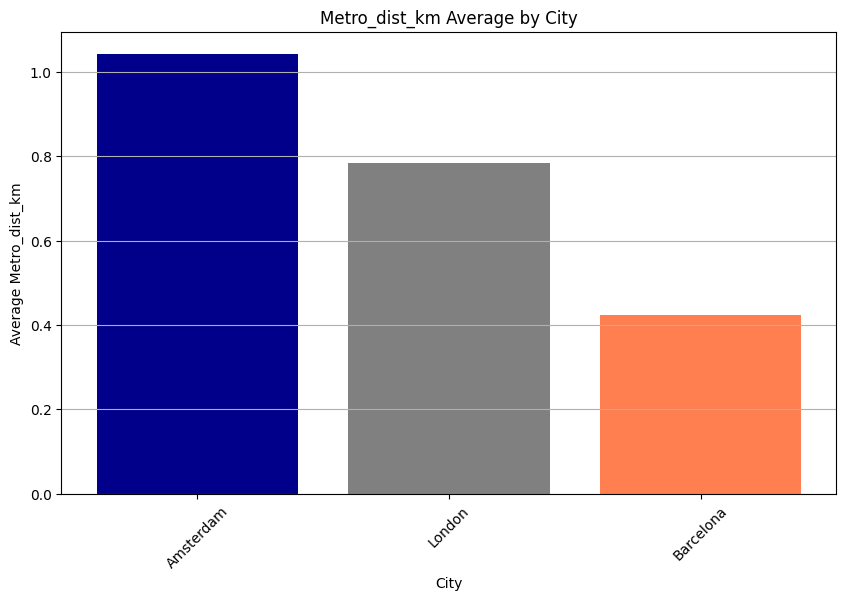

In [45]:
# Loop through each variable in vars_to_analysis
colors = ['darkblue', 'grey', 'coral']
for var in vars_to_analysis:
    # Calculate average for each city for the current variable
    average_price = df_subset.groupby('city')[var].mean().reset_index()
    # Sort the averages in descending order
    average_price = average_price.sort_values(by=var, ascending=False)
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(average_price['city'], average_price[var], color=colors[:len(average_price)])
    # Adding labels and title specific to the variable
    plt.title(f'{var.capitalize()} Average by City')
    plt.xlabel('City')
    plt.ylabel(f'Average {var.capitalize()}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

---

# Cloncusion

After runing code to have variables type and their distribution checked, average of `daily_price` rent calculated and data visualisation analysed to better interpret the dataset, I can conclude in this step of my analysis that:

  + Three alerts were returned for the data exploration, two of them are for `bedrooms` and `weekends` variables. Both variables were analised and them won't cause any misleading to the analysis. The third alert is regarding values of the `daily_price` variable, it is highly skewed (γ1 = 21.41995499). The logarithm transformation was applied to `daily_price` and a could confirm that data was normalised and this information will help with the ML prediction;

  + There are some high values for `daily_price` presented in the dataset. Values were filtered to up 2000. With that I did not have any misleading in my conclusion of the three best average prices listing and got one more information that will help with the ML prediction;

  + After have `pearson` and `spearman` correlation checked between `daily_prices` and variables available in the dataset, I could conclude that main variables with correlation to the price of airbnb properties are `bedrooms`, `city_center_dist_km` respectively. The `metro_dist_km` has a weaker influence compared to the other variables;
  
  + Creating visualisation for the dataset helped me to better undesrtand the distribuition of numerical variables to interpret the results of my analysis.